# **Layer 12**

## **Prepare Environment**

### Import libraries and modules



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

### Load the dataset
*   Training Data
*   Validation Data
*   Test Data

In [2]:
train_path = 'D:\\ACADEMIC\\SEMESTER 07\\ML - 3\\project\\Layer12\\train.csv'
valid_path = 'D:\\ACADEMIC\\SEMESTER 07\\ML - 3\\project\\Layer12\\valid.csv'
test_path = 'D:\\ACADEMIC\\SEMESTER 07\\ML - 3\\project\\Layer12\\test.csv'

train_data = pd.read_csv(train_path)

valid_data = pd.read_csv(valid_path)

test_data = pd.read_csv(test_path)

### Dataset Info and split dataset according to the labels

In [3]:
print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)

(28520, 772)
(750, 772)
(744, 769)


In [4]:
train_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.031138,0.079892,0.157382,-0.014636,-0.051778,-0.021332,-0.073593,-0.005386,-0.212557,0.099683,...,-0.085248,-0.096007,-0.000766,0.021399,-0.041432,0.094806,45,NaN,1,6
1,0.113040,0.175731,0.217741,-0.196254,-0.010129,-0.030586,0.067114,-0.072412,-0.239192,0.104741,...,-0.090283,-0.053885,-0.010967,0.062209,-0.122958,0.192949,45,NaN,1,6
2,0.048570,0.091281,0.160776,-0.150937,0.020115,0.044117,-0.050092,-0.045661,-0.155332,0.117206,...,-0.021524,-0.008411,-0.006248,0.031468,-0.056915,0.154731,45,NaN,1,6
3,0.039212,0.118388,0.173831,-0.096659,-0.008702,0.061298,0.008974,-0.003277,-0.065046,0.095480,...,-0.071936,-0.023120,-0.007812,0.057600,-0.121892,0.072796,45,NaN,1,6
4,0.056019,0.170639,0.157917,-0.228605,-0.065965,-0.088732,-0.082243,-0.080568,-0.341500,0.142430,...,-0.155621,-0.079447,0.015316,0.127726,-0.151966,0.169634,45,NaN,1,6


In [5]:
valid_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.153978,0.503276,0.022196,0.226684,0.466179,0.154995,0.195452,-0.288972,-0.297589,-0.008409,...,-0.503624,-0.056849,-0.117077,0.168611,0.373346,0.037188,45,NaN,1,6
1,0.056877,0.261613,0.050610,0.097744,0.322375,-0.011609,0.201331,-0.194763,-0.194228,-0.094267,...,-0.442110,0.008424,-0.067920,0.165600,0.333104,-0.270913,45,NaN,1,6
2,0.225439,0.350977,-0.295782,0.280168,0.705114,0.020545,0.390878,-0.322853,0.071575,0.013803,...,-0.380124,-0.089572,-0.023344,0.194312,0.269537,-0.292029,45,NaN,1,6
3,0.288556,0.513905,-0.205246,0.279660,0.469121,0.068339,0.131205,-0.338951,-0.270848,0.007799,...,-0.529678,-0.093194,-0.148418,0.405543,0.438906,-0.055119,45,NaN,1,6
4,0.165176,0.312492,-0.217504,0.259960,0.568979,-0.093011,0.257977,-0.277132,-0.172113,-0.025929,...,-0.504997,-0.108256,0.036867,0.267815,0.245041,0.117444,45,NaN,1,6


In [6]:
test_data.head()

,ID,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,1,0.124623,0.196628,0.257004,-0.156045,-0.054916,0.006071,-0.035149,-0.092019,-0.196302,...,-0.221466,0.140292,0.123622,-0.175572,-0.107030,-0.087621,-0.026501,0.139337,-0.083030,0.059507
1,2,0.109655,0.170158,0.227644,-0.127088,-0.044476,-0.046852,-0.090026,-0.061321,-0.227288,...,-0.204930,0.110203,0.085665,-0.286787,-0.113195,-0.057312,-0.055680,0.143939,-0.045760,0.106113
2,3,0.014854,0.030051,0.115092,-0.017179,0.002720,-0.011692,-0.078855,-0.042991,-0.096283,...,-0.032937,0.075821,0.030987,-0.149850,-0.003155,-0.010207,-0.001427,0.000934,-0.017069,0.048123
3,4,0.196893,0.113314,0.352175,-0.108499,-0.064472,-0.073239,-0.086402,0.008671,-0.342217,...,-0.255167,0.096579,0.069413,-0.215386,-0.075168,-0.035071,-0.023375,0.067768,-0.181530,0.174444
4,5,0.033004,0.013373,0.124001,-0.016143,0.010120,0.010635,-0.055789,-0.036282,-0.059422,...,-0.035814,0.093764,0.027321,-0.116009,0.010096,-0.042293,0.005347,0.007722,-0.007731,0.058799


Drop the ID column from the test dataset

In [7]:
test_IDs = test_data['ID'].to_numpy()
test_data = test_data.drop(columns=['ID'])

Prepare training and validation data for each label

In [8]:
train_data_label1 = train_data.drop(columns=['label_2', 'label_3', 'label_4'])
train_data_label2 = train_data.drop(columns=['label_1', 'label_3', 'label_4'])
train_data_label3 = train_data.drop(columns=['label_1', 'label_2', 'label_4'])
train_data_label4 = train_data.drop(columns=['label_1', 'label_2', 'label_3'])

valid_data_label1 = valid_data.drop(columns=['label_2', 'label_3', 'label_4'])
valid_data_label2 = valid_data.drop(columns=['label_1', 'label_3', 'label_4'])
valid_data_label3 = valid_data.drop(columns=['label_1', 'label_2', 'label_4'])
valid_data_label4 = valid_data.drop(columns=['label_1', 'label_2', 'label_3'])

# Define Functions

## Feature Engineering

> *Train a model to predict the label 01 after appling some feature engineering techniques and methods to the training data.
Features are selected based on the correlation matrix and the PCA used to extract the features*

### Data Cleaning



> Remove null values for labels and determine missing values in features


**Drop** the rows where there are null values for the lables in the training dataset

In [9]:
def clean_null_labels(train_data_label1, label):
    print("Train set shape before: {}".format(train_data_label1.shape))

    train_features_null_counts = train_data_label1.drop(columns=[f'label_{label}']).isnull().sum()
    train_label_null_count = train_data_label1[f'label_{label}'].isnull().sum()
    print("Null value counts of the features\n{}".format(train_features_null_counts))
    print("Null value count: {}".format(train_label_null_count))

    cleaned = train_data_label1.dropna(subset=train_data_label1.columns[-1:], how='any')
    print("Train set shape after: {}".format(cleaned.shape))
    return cleaned

Fill the null values in the features with their **means** in the datasets.

In [10]:
def fill_null_features(train_data_label1, valid_data_label1, test_data):
    train_data_label1 = train_data_label1.fillna(train_data_label1.mean())
    valid_data_label1 = valid_data_label1.fillna(valid_data_label1.mean())
    test_data = test_data.fillna(test_data.mean())
    return train_data_label1, valid_data_label1, test_data

Split the Features and Labels in the dataset

In [11]:
def split_features_labels(train_data_label1, valid_data_label1, test_data, label):
    train_features_label1 = train_data_label1.iloc[:, :-1]
    train_label1 = train_data_label1[f'label_{label}']

    valid_features_label1 = valid_data_label1.iloc[:, :-1]
    valid_label1 = valid_data_label1[f'label_{label}']

    test_features_label1 = test_data
    return train_features_label1, train_label1, valid_features_label1, valid_label1, test_features_label1

Label 01 distribution after cleaning

In [12]:
def plot_label(train_label1, label):    
    labels, counts = np.unique(train_label1, return_counts=True)

    plt.figure(figsize=(18, 3))
    plt.xticks(labels)
    plt.bar(labels, counts)
    plt.xlabel(f'label_{label}')
    plt.ylabel('Frequency')
    plt.title('Distribution of the Label')
    plt.show()

### Feature Standardization

> Standardize the features of the dataset using **Robust scaler**

In [13]:
def standardize_data(train_features_label1, valid_features_label1, test_features_label1, scaler=StandardScaler()): 
    standardized_train_features_label1 = scaler.fit_transform(train_features_label1)
    standardized_valid_features_label1 = scaler.transform(valid_features_label1)
    standardized_test_features_label1 = scaler.transform(test_features_label1)
    return standardized_train_features_label1, standardized_valid_features_label1, standardized_test_features_label1

### Feature Extraction

> Principal Componenet Analysis(PCA) used to extract the features that can explain the variance of the label to 95% and display the resulting explained variances of each PC

In [14]:
def apply_PCA(standardized_train_features_label1, standardized_valid_features_label1, standardized_test_features_label1, variance_threshold):

    pca = PCA(n_components=variance_threshold, svd_solver='full')

    pca_train_features_label1 = pca.fit_transform(standardized_train_features_label1)
    pca_valid_features_label1 = pca.transform(standardized_valid_features_label1)
    pca_test_features_label1 = pca.transform(standardized_test_features_label1)

    explained_variance_ratio_reduced = pca.explained_variance_ratio_

    plt.figure(figsize=(18, 10))
    plt.bar(range(1, pca_train_features_label1.shape[1] + 1), explained_variance_ratio_reduced)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio per Principal Component (Reduced)')
    plt.show()

    print("\nReduced Train feature matrix shape: {}".format(pca_train_features_label1.shape))
    print("Reduced valid feature matrix shape: {}".format(pca_valid_features_label1.shape))
    print("Reduced test feature matrix shape: {}".format(pca_test_features_label1.shape))
    
    return pca_train_features_label1, pca_valid_features_label1, pca_test_features_label1

## Hyperparameter tuning

Define parameters for random search

In [18]:
def get_hyper_params():
    svm_grid_params = {
        'C': [0.1, 1, 10, 100, 1000],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf','linear']
    }

    knn_grid_params = {
        'n_neighbors' : [3, 5, 7, 9, 11, 13],
        'weights' : ['uniform', 'distance'],
        'metric' : ['minkowski', 'euclidean', 'manhattan', 'hamming']
    }

    random_forest_grid_params = {
        'bootstrap': [True, False],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    }
    return svm_grid_params, knn_grid_params, random_forest_grid_params

Tune hyperparameters with the best method by testing severel methods and for several models

In [19]:
def tune_hyper_params(svm_grid_params, knn_grid_params, rf_grid_params, pca_train_features_label1, train_label1, rand=True):
    classification_models_params = [
        ('SVM', SVC(), svm_grid_params),
    #     ('K Neighbors', KNeighborsClassifier(), knn_grid_params),
    #     ('Random Forest', RandomForestClassifier(), rf_grid_params)
    ]

    for model_name, model, grid_params in classification_models_params:
        if rand:
            search = RandomizedSearchCV(
                estimator = model,
                param_distributions = grid_params,
                n_iter = 40, cv = 3, verbose=4, random_state=42, n_jobs = -1
            )
        else:
            search = HalvingGridSearchCV(
                estimator=model,
                param_grid=grid_params,
                cv=3,
                n_jobs=-1,
                factor=2,
                verbose=2
            )
        result = search.fit(pca_train_features_label1, train_label1)

        print(f"best score for {model_name} : {result.best_score_}")
        print(f"best hyper parameters for {model_name} : {result.best_params_}")

## Train the best performing model

Select the model that best predicts the valid and test datasets based on accuracy, precision and recall and train

In [20]:
def train_model(pca_train_features_label1, train_label1, pca_valid_features_label1, valid_label1, svm=None, rf=None, knn=None):
    classification_models = [
        # ('K Neighbors', knn),
        # ('Random Forest', rf),
        ('SVM', svm)
        
    ]
    
    models = []

    for model_name, model in classification_models:
        num_features = pca_train_features_label1.shape[1]
        print(f"{model_name} is training for {num_features} number of features\n")
        
        models.append(model)
        kf = KFold(n_splits=3, random_state=42, shuffle=True)
        cross_val_scores = cross_val_score(model, pca_train_features_label1, train_label1, cv=kf, verbose=4)

        print("CV Accuracy: %0.4f accuracy with a standard deviation of %0.2f" % (cross_val_scores.mean(), cross_val_scores.std()))
        print("\n")
    
    return models

In [21]:
def get_test_result(pca_train_features_label1, train_label1, pca_test_features_label1, model): 
    model.fit(pca_train_features_label1, train_label1)
    return model.predict(pca_test_features_label1)

In [22]:
def create_csv(ID, pred_label1, destination):
  df = pd.DataFrame()

  df.insert(loc=0, column='ID', value=ID)
  df.insert(loc=1, column='label_1', value=pred_label1)

  df.to_csv(destination, index=False)

# Label 01

Train set shape before: (28520, 769)
Null value counts of the features
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
              ..
feature_764    0
feature_765    0
feature_766    0
feature_767    0
feature_768    0
Length: 768, dtype: int64
Null value count: 0
Train set shape after: (28520, 769)


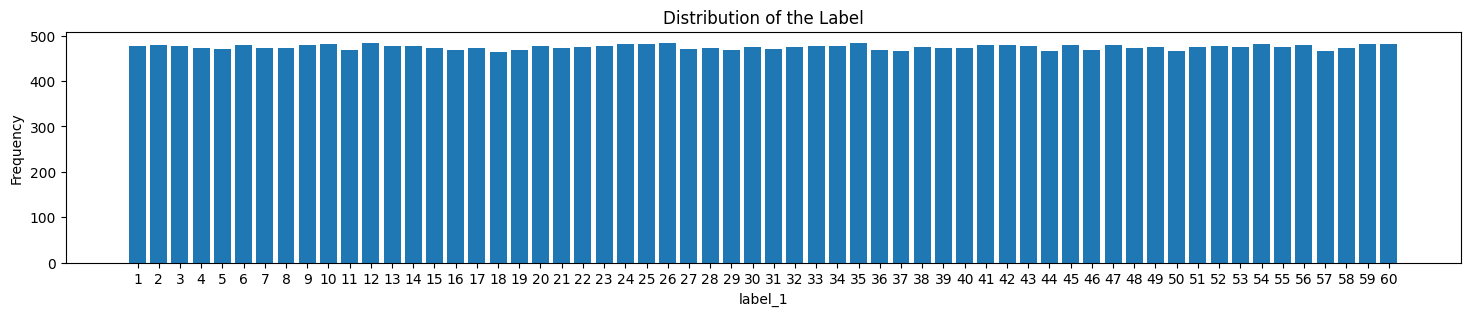

In [23]:
train_data_label1 = clean_null_labels(train_data_label1, 1)
train_data_label1, valid_data_label1, test_data = fill_null_features(train_data_label1, valid_data_label1, test_data)
train_features_label1, train_label1, valid_features_label1, valid_label1, test_features_label1 = split_features_labels(train_data_label1, valid_data_label1, test_data, 1)
plot_label(train_label1, 1)

In [24]:
standardized_train_features_label1, standardized_valid_features_label1, standardized_test_features_label1 = standardize_data(train_features_label1, valid_features_label1, test_features_label1, StandardScaler())

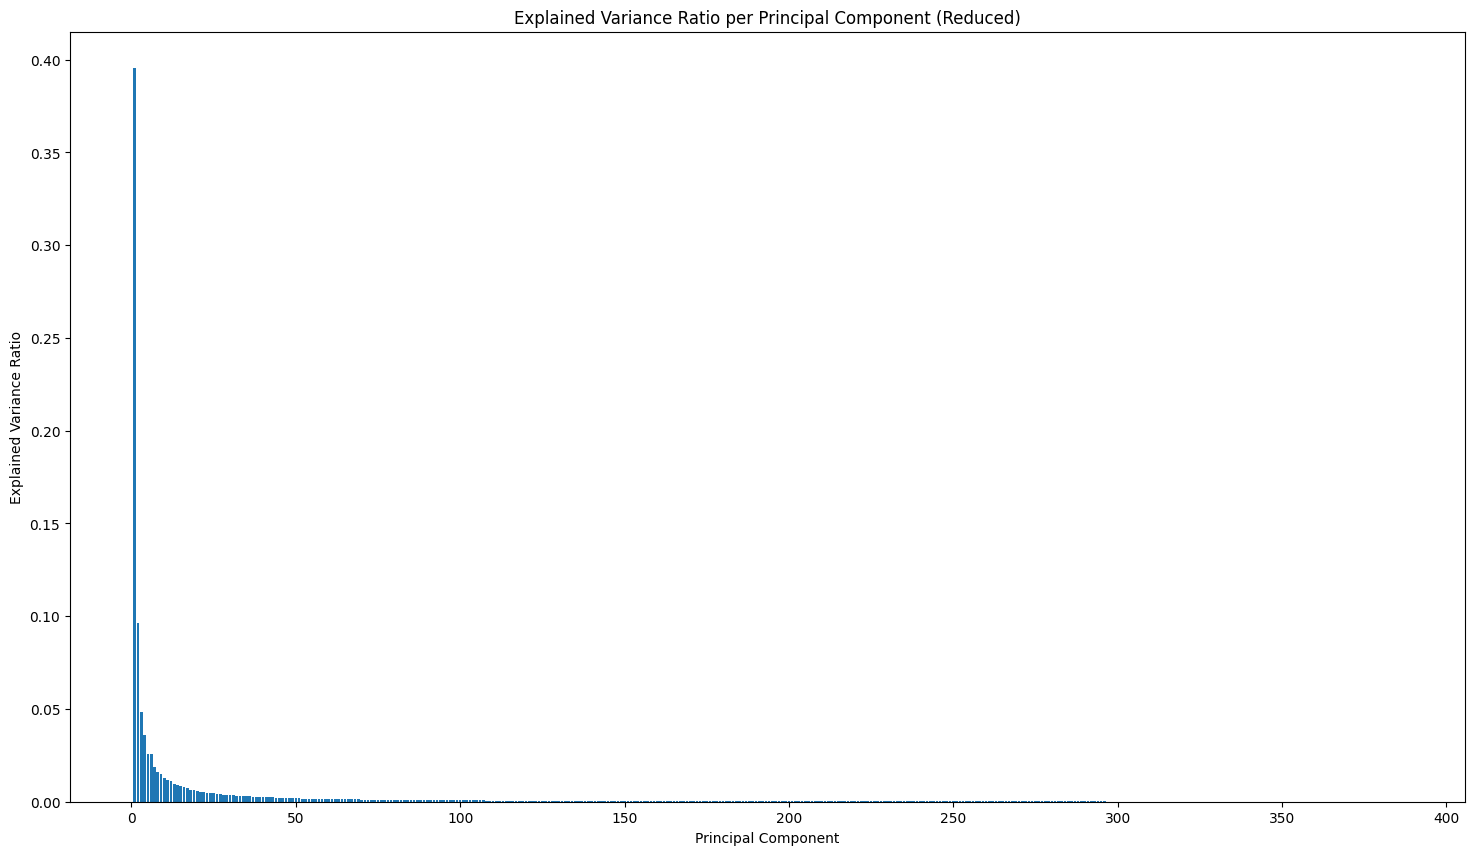


Reduced Train feature matrix shape: (28520, 386)
Reduced valid feature matrix shape: (750, 386)
Reduced test feature matrix shape: (744, 386)


In [25]:
pca_train_features_label1, pca_valid_features_label1, pca_test_features_label1 = apply_PCA(standardized_train_features_label1, standardized_valid_features_label1, standardized_test_features_label1, 0.99)

In [ ]:
# svm_grid_params, knn_grid_params, random_forest_grid_params = get_hyper_params()
# tune_hyper_params(svm_grid_params, knn_grid_params, random_forest_grid_params, pca_train_features_label1, train_label1, rand=True)

In [26]:
model1 = train_model(standardized_train_features_label1, train_label1, standardized_valid_features_label1, valid_label1, SVC(C=100, gamma=0.001, kernel='rbf', class_weight='balanced'))

SVM is training for 768 number of features

[CV] END ................................ score: (test=0.937) total time= 2.5min
[CV] END ................................ score: (test=0.941) total time= 2.4min
[CV] END ................................ score: (test=0.934) total time= 2.5min
[CV] END ................................ score: (test=0.933) total time= 2.4min
[CV] END ................................ score: (test=0.932) total time= 2.5min
CV Accuracy: 0.9354 accuracy with a standard deviation of 0.00




In [28]:
y_pred_test_label1 = get_test_result(standardized_train_features_label1, train_label1, standardized_test_features_label1, model1[0])

In [34]:
destination = 'D:\\ACADEMIC\\SEMESTER 07\\ML - 3\\project\\Layer12\\results\\01.csv'

create_csv(test_IDs, y_pred_test_label1, destination)

# Label 02

Train set shape before: (28520, 769)
Null value counts of the features
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
              ..
feature_764    0
feature_765    0
feature_766    0
feature_767    0
feature_768    0
Length: 768, dtype: int64
Null value count: 480
Train set shape after: (28040, 769)


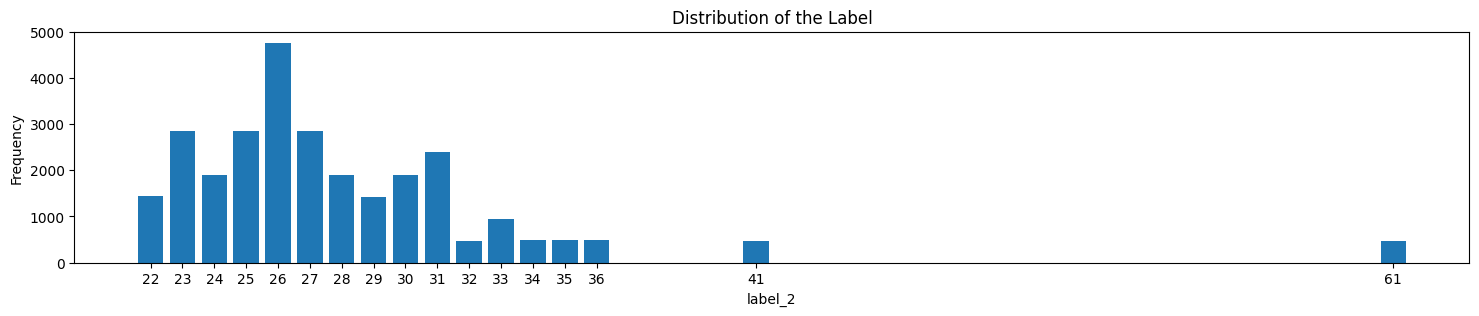

In [23]:
train_data_label2 = clean_null_labels(train_data_label2, 2)
train_data_label2, valid_data_label2, test_data = fill_null_features(train_data_label2, valid_data_label2, test_data)
train_features_label2, train_label2, valid_features_label2, valid_label2, test_features_label2 = split_features_labels(train_data_label2, valid_data_label2, test_data, 2)
plot_label(train_label2, 2)

In [24]:
standardized_train_features_label2, standardized_valid_features_label2, standardized_test_features_label2 = standardize_data(train_features_label2, valid_features_label2, test_features_label2, StandardScaler())

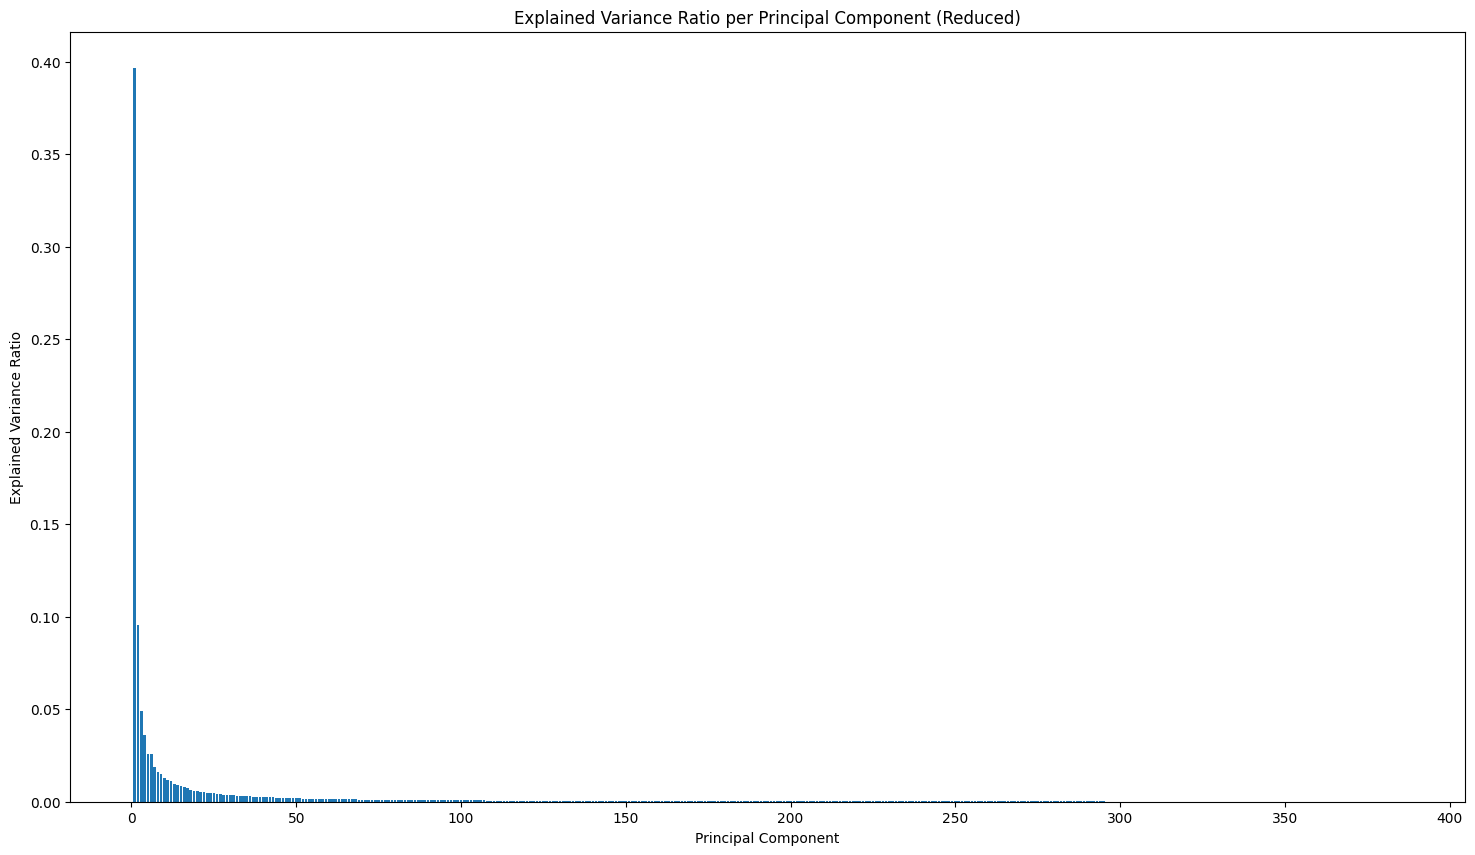


Reduced Train feature matrix shape: (28040, 385)
Reduced valid feature matrix shape: (750, 385)
Reduced test feature matrix shape: (744, 385)


In [25]:
pca_train_features_label2, pca_valid_features_label2, pca_test_features_label2 = apply_PCA(standardized_train_features_label2, standardized_valid_features_label2, standardized_test_features_label2, 0.99)

In [26]:
# svm_grid_params, knn_grid_params, random_forest_grid_params = get_hyper_params()
# tune_hyper_params(svm_grid_params, knn_grid_params, random_forest_grid_params, pca_train_features_label2, train_label2, rand=True)

In [32]:
model2 = train_model(standardized_train_features_label2, train_label2, standardized_valid_features_label2, valid_label2, SVC(C=100, gamma=0.001, kernel='rbf', class_weight='balanced'))

SVM is training for 768 number of features

[CV] END ................................ score: (test=0.886) total time= 3.3min
[CV] END ................................ score: (test=0.886) total time= 3.3min
[CV] END ................................ score: (test=0.882) total time= 3.0min
CV Accuracy: 0.8847 accuracy with a standard deviation of 0.00




In [33]:
y_pred_test_label2 = get_test_result(standardized_train_features_label2, train_label2, standardized_test_features_label2, model2[0])

In [34]:
destination = 'D:\\ACADEMIC\\SEMESTER 07\\ML - 3\\project\\Layer12\\results\\02.csv'

create_csv(test_IDs, y_pred_test_label2, destination)

# Label 03

Train set shape before: (28520, 769)
Null value counts of the features
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
              ..
feature_764    0
feature_765    0
feature_766    0
feature_767    0
feature_768    0
Length: 768, dtype: int64
Null value count: 0
Train set shape after: (28520, 769)


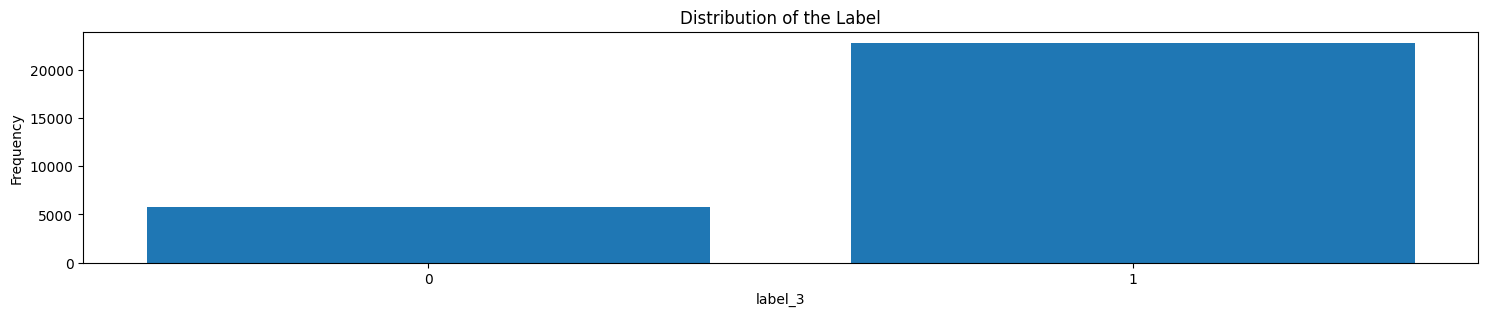

In [23]:
train_data_label3 = clean_null_labels(train_data_label3, 3)
train_data_label3, valid_data_label3, test_data = fill_null_features(train_data_label3, valid_data_label3, test_data)
train_features_label3, train_label3, valid_features_label3, valid_label3, test_features_label3 = split_features_labels(train_data_label3, valid_data_label3, test_data, 3)
plot_label(train_label3, 3)

In [24]:
standardized_train_features_label3, standardized_valid_features_label3, standardized_test_features_label3 = standardize_data(train_features_label3, valid_features_label3, test_features_label3, StandardScaler())

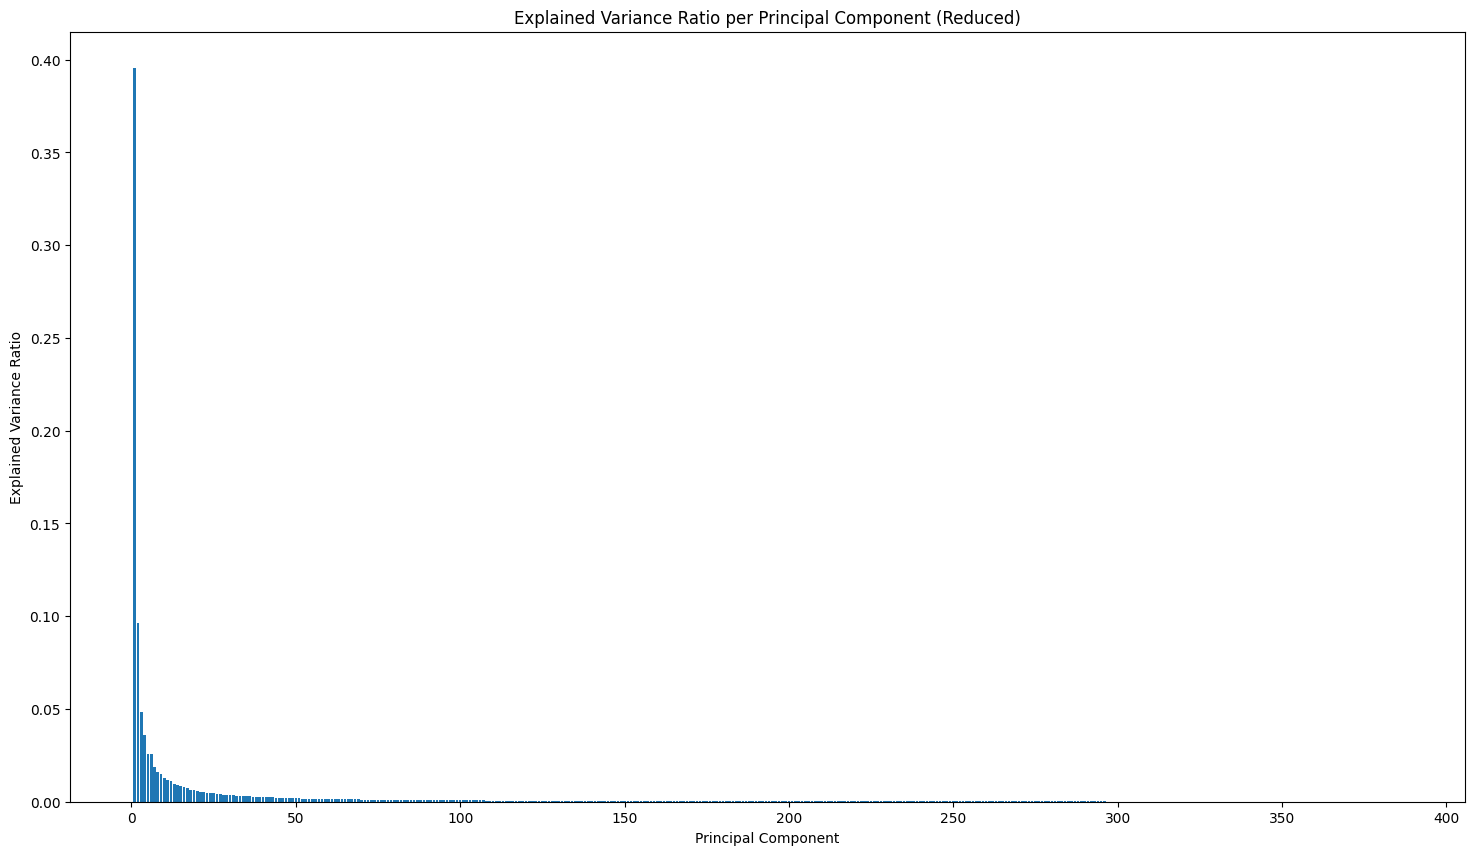


Reduced Train feature matrix shape: (28520, 386)
Reduced valid feature matrix shape: (750, 386)
Reduced test feature matrix shape: (744, 386)


In [25]:
pca_train_features_label3, pca_valid_features_label3, pca_test_features_label3 = apply_PCA(standardized_train_features_label3, standardized_valid_features_label3, standardized_test_features_label3, 0.99)

In [ ]:
# svm_grid_params, knn_grid_params, random_forest_grid_params = get_hyper_params()
# tune_hyper_params(svm_grid_params, knn_grid_params, random_forest_grid_params, pca_train_features_label3, train_label3, rand=True)

In [26]:
model3 = train_model(standardized_train_features_label3, train_label3, standardized_valid_features_label3, valid_label3, SVC(C=100, gamma=0.001, kernel='rbf', class_weight='balanced'))

SVM is training for 768 number of features

[CV] END ................................ score: (test=0.995) total time=  21.5s
[CV] END ................................ score: (test=0.996) total time=  20.8s
[CV] END ................................ score: (test=0.995) total time=  19.7s
CV Accuracy: 0.9953 accuracy with a standard deviation of 0.00




In [ ]:
y_pred_test_label3 = get_test_result(standardized_train_features_label3, train_label3, standardized_test_features_label3, model3[0])

In [ ]:
destination = 'D:\\ACADEMIC\\SEMESTER 07\\ML - 3\\project\\Layer12\\results\\03.csv'

create_csv(test_IDs, y_pred_test_label3, destination)

# Label 04

Train set shape before: (28520, 769)
Null value counts of the features
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
              ..
feature_764    0
feature_765    0
feature_766    0
feature_767    0
feature_768    0
Length: 768, dtype: int64
Null value count: 0
Train set shape after: (28520, 769)


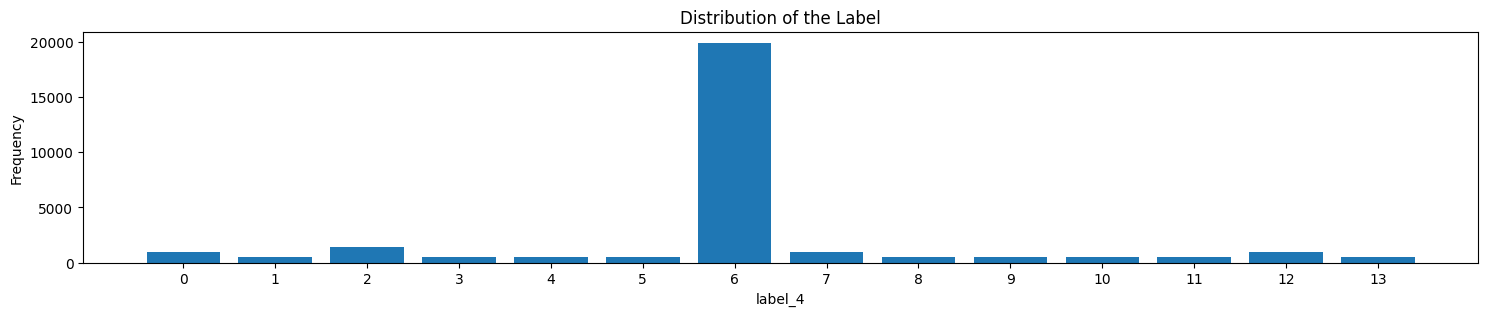

In [ ]:
train_data_label4 = clean_null_labels(train_data_label4, 4)
train_data_label4, valid_data_label4, test_data = fill_null_features(train_data_label4, valid_data_label4, test_data)
train_features_label4, train_label4, valid_features_label4, valid_label4, test_features_label4 = split_features_labels(train_data_label4, valid_data_label4, test_data, 4)
plot_label(train_label4, 4)

In [ ]:
standardized_train_features_label4, standardized_valid_features_label4, standardized_test_features_label4 = standardize_data(train_features_label4, valid_features_label4, test_features_label4, StandardScaler())

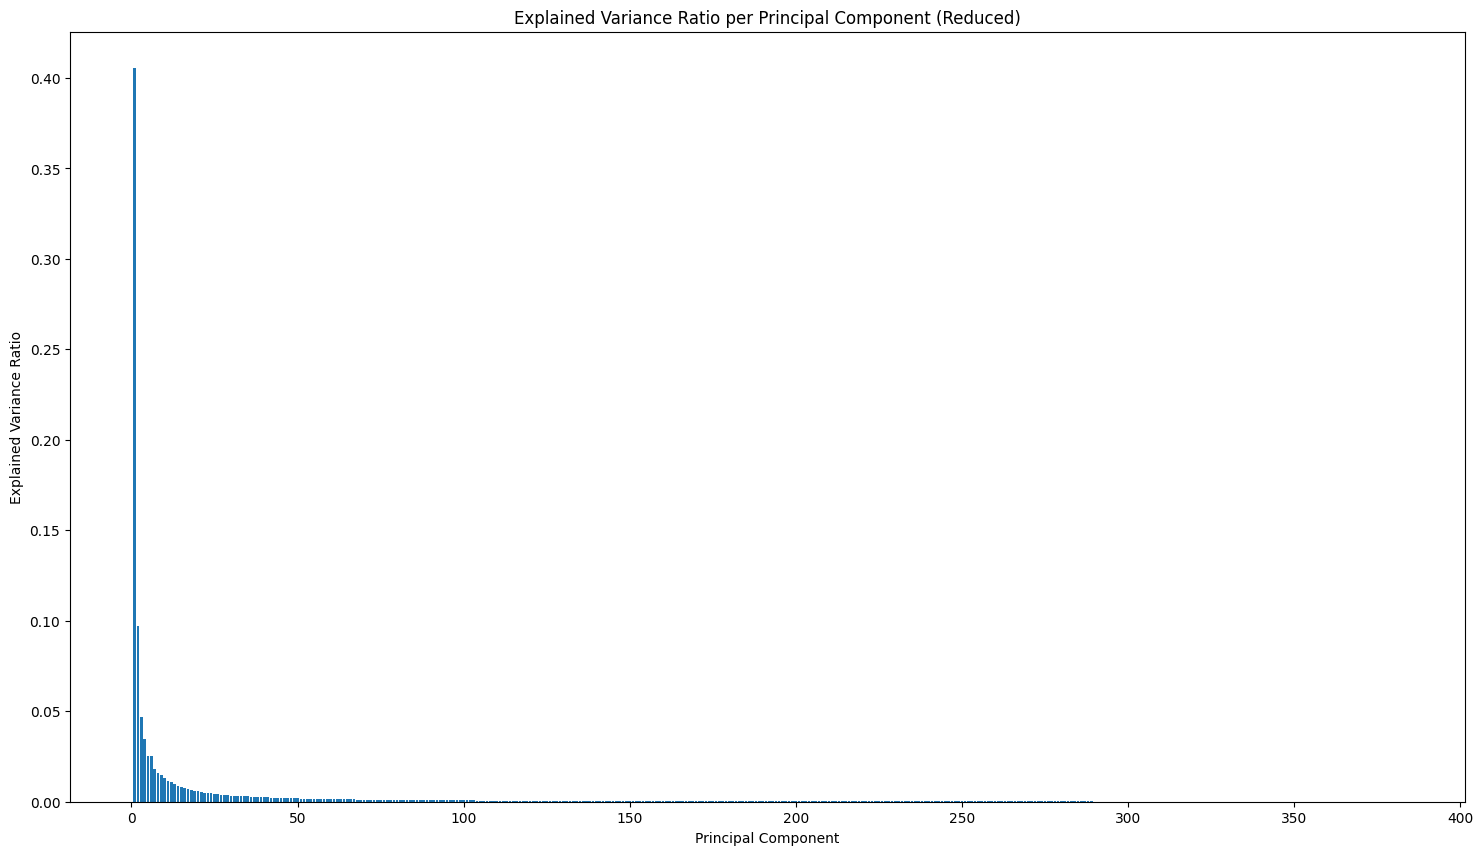


Reduced Train feature matrix shape: (28520, 382)
Reduced valid feature matrix shape: (750, 382)
Reduced test feature matrix shape: (744, 382)


In [ ]:
pca_train_features_label4, pca_valid_features_label4, pca_test_features_label4 = apply_PCA(standardized_train_features_label4, standardized_valid_features_label4, standardized_test_features_label4, 0.99)

In [ ]:
svm_grid_params, knn_grid_params, random_forest_grid_params = get_hyper_params()
tune_hyper_params(svm_grid_params, knn_grid_params, random_forest_grid_params, pca_train_features_label4, train_label4, rand=True)

In [ ]:
model4 = train_model(standardized_train_features_label4, train_label4, standardized_valid_features_label4, valid_label4, SVC(C=100, gamma=0.001, kernel='rbf', class_weight='balanced'))

In [ ]:
y_pred_test_label4 = get_test_result(standardized_train_features_label4, train_label4, standardized_test_features_label4, model4[0])

In [ ]:
destination = 'D:\\ACADEMIC\\SEMESTER 07\\ML - 3\\project\\Layer12\\results\\04.csv'

create_csv(test_IDs, y_pred_test_label4, destination)

## Create CSV for all results

In [ ]:
destination = 'D:\\ACADEMIC\\SEMESTER 07\\ML - 3\\project\\Layer12\\results\\190507U.csv'

# create the csv output file
create_csv(test_IDs, y_pred_test_label1, y_pred_test_label2, y_pred_test_label3, y_pred_test_label4, destination)